# Sprint 8 - Proyecto

Paso 4. Análisis exploratorio de datos (Python)

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

 Para estos dos datasets ahora necesitas

importar los archivos
estudiar los datos que contienen
asegurarte de que los tipos de datos sean correctos
identificar los 10 principales barrios en términos de finalización del recorrido
hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
sacar conclusiones basadas en cada gráfico y explicar los resultados
Paso 5. Prueba de hipótesis (Python)

project_sql_result_07.csv — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:

start_ts: fecha y hora de la recogida
weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
duration_seconds: duración del viaje en segundos
Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decide por tu cuenta dónde establecer el nivel de significación (alfa).

Explica:

cómo planteaste las hipótesis nula y alternativa
qué criterio usaste para probar las hipótesis y por qué

# Los 10 principales barrios 

In [8]:
#Importar librerias 

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Cargar los datos

df_1 = pd.read_csv('project_sql_result_01.csv')
df_2 = pd.read_csv('project_sql_result_04.csv')
df_3 = pd.read_csv('project_sql_result_07.csv')

# Mostrar información del DataFrame

df_1.head()
df_1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# Mostrar información del DataFrame

df_2.head()
df_2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB



In [ ]:
# Mostrar información del DataFrame

df_3.head()
df_3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB



# Correccion de los datos 

##### Solo se necesita corregir el tecer DataFrame. Convertiremos 'start_ts' de 'object' a 'datetime' para evitar problemas 

In [9]:
# Convertir las fechas en df_3
df_3['start_ts'] = pd.to_datetime(df_3['start_ts'])

# S# Verificar el cambio para ver los tipos de datos
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


# Top 10 empresas de taxi y Top 10 barrios

In [10]:
top_10_barrios = df_2.nlargest(10, 'average_trips') # Obtenemos el top 10 barrios
print(top_10_barrios)

top_10_empresas = df_1.nlargest(10, 'trips_amount') # Obtenemos el top 
print ()
print (top_10_empresas)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953


# Top 10 Empresas de taxis y numero de viajes

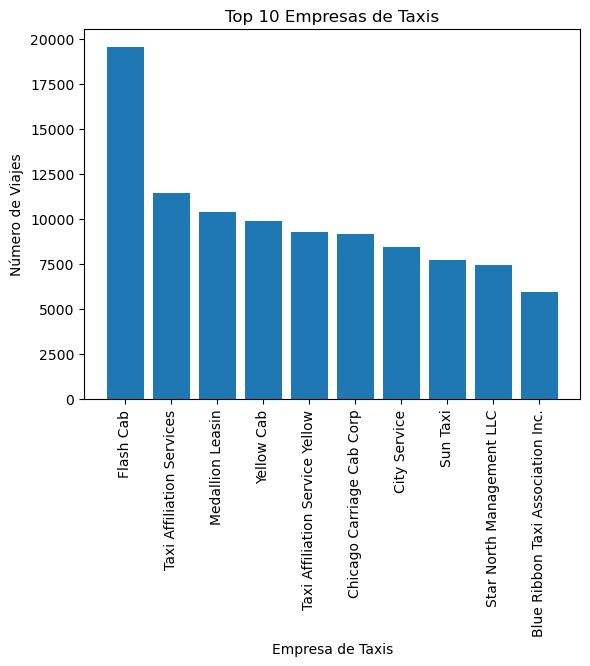

In [11]:
plt.bar(top_10_empresas['company_name'], top_10_empresas['trips_amount'])
plt.title('Top 10 Empresas de Taxis')
plt.xlabel('Empresa de Taxis')
plt.ylabel('Número de Viajes')
plt.xticks(rotation=90)
plt.show()


# Grafico para los 10 barrios principales:

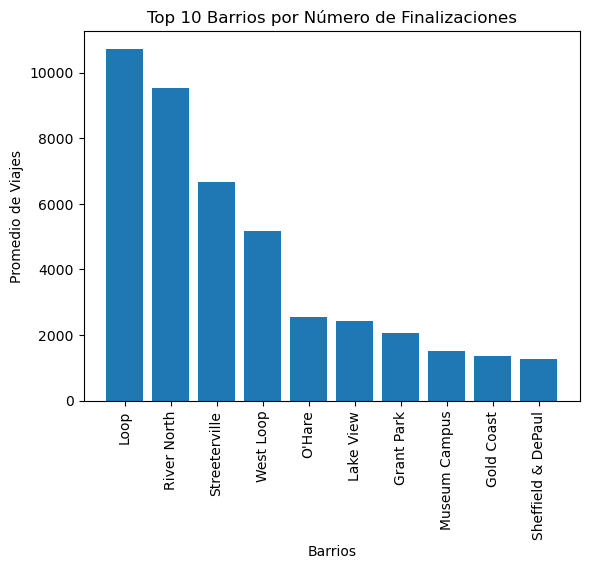

In [12]:
plt.bar(top_10_barrios['dropoff_location_name'], top_10_barrios['average_trips'])
plt.title('Top 10 Barrios por Número de Finalizaciones')
plt.xlabel('Barrios')
plt.ylabel('Promedio de Viajes')
plt.xticks(rotation=90)
plt.show()

# Prueba de Hipótesis 

In [13]:
# Filtrar los datos para sábados lluviosos
lluviosos = df_3[(df_3['weather_conditions'] == 'Bad') & (pd.to_datetime(df_3['start_ts']).dt.dayofweek == 5)]

# Filtrar los datos para otros días (no lluviosos o no sábados)
otros_dias = df_3[(df_3['weather_conditions'] != 'Bad') | (pd.to_datetime(df_3['start_ts']).dt.dayofweek != 5)]

# Duraciones
duracion_lluviosos = lluviosos['duration_seconds']
duracion_otros = otros_dias['duration_seconds']

# Verificar si hay datos en ambas muestras
print(f'Datos lluviosos: {duracion_lluviosos}')
print(f'Datos otros días: {duracion_otros}')

# Prueba t solo si hay datos en ambas muestras
if not duracion_lluviosos.empty and not duracion_otros.empty:
    # Realizar la prueba de Levene para comprobar la igualdad de varianzas
    stat_levene, p_value_levene = stats.levene(duracion_lluviosos, duracion_otros)
    print(f'Levene statistic: {stat_levene}, P-value: {p_value_levene}')
    
    # Establecer el nivel de significación
    alpha = 0.05
    if p_value_levene < alpha:
        print("Rechazamos la hipótesis nula de igualdad de varianzas.")
        equal_var = False  # Las varianzas no son iguales
    else:
        print("No rechazamos la hipótesis nula de igualdad de varianzas.")
        equal_var = True  # Las varianzas son iguales

    # Realizar la prueba t considerando el resultado de la prueba de Levene
    t_stat, p_value_t = stats.ttest_ind(duracion_lluviosos, duracion_otros, equal_var=equal_var)
    print(f'T-statistic: {t_stat}, P-value: {p_value_t}')
    
    # Evaluar la hipótesis nula de la prueba t
    if p_value_t < alpha:
        print("Rechazamos la hipótesis nula: la duración promedio de los viajes cambia los sábados lluviosos.")
    else:
        print("No rechazamos la hipótesis nula: no hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia los sábados lluviosos.")
else:
    print('No hay suficientes datos para realizar la prueba t.')

Datos lluviosos: 6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64
Datos otros días: 0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1062    1500.0
1063       0.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 888, dtype: float64
Levene statistic: 0.38853489683656073, P-value: 0.5332038671974493
No rechazamos la hipótesis nula de igualdad de varianzas.
T-statistic: 6.946177714041499, P-value: 6.517970327099473e-12
Rechazamos la hipótesis nula: la duración promedio de los viajes cambia los sábados lluviosos.


# Planteamiento de las hipótesis

#### Criterio para probar las hipótesis: Para probar estas hipótesis, utilice una prueba t de Student, que es adecuada para comparar las medias de dos grupos independientes (en este caso, los sábados lluviosos y otros días). Aquí están los pasos que segui:

#### Filtrado de datos: Primero, filtre los datos para obtener dos conjuntos: uno para los sábados lluviosos y otro para otros días. Esto es crucial para asegurar la comparacion de grupos relevantes.

#### Prueba de Levene: Antes de realizar la prueba t, realice la prueba de Levene para verificar la igualdad de varianzas entre los dos grupos. Esto es importante porque la prueba t asume que las varianzas son iguales. En este caso, el p-valor de la prueba de Levene fue mayor que el nivel de significación (α = 0.05), lo que indica que no hay evidencia suficiente para rechazar la hipótesis nula de igualdad de varianzas.

#### Prueba t: Luego, realice la prueba t considerando el resultado de la prueba de Levene. El p-valor obtenido fue extremadamente bajo (6.517970327099473e-12), lo que indica que hay una diferencia significativa en la duración promedio de los viajes entre los sábados lluviosos y otros días.

### Decisión

#### Dado que el p-valor de la prueba t fue menor que el nivel de significación (α = 0.05), he decidido rechazar la hipótesis nula. Esto significa que hay evidencia suficiente para afirmar que la duración promedio de los viajes cambia los sábados lluviosos.